# What's New in Marvin 2.2!
Lots of things are new in Marvin 2.2.0.  See the list with links to individual sections here http://sdss-marvin.readthedocs.io/en/latest/whats-new.html

## Marvin now includes MPL-6 data

In [39]:
%matplotlib inline
from marvin import config
config.switchSasUrl('local')
config.forceDbOff()

In [2]:
from marvin.tools.cube import Cube
plateifu='8485-1901'
cube = Cube(plateifu=plateifu)
print(cube)
maps = cube.getMaps(bintype='HYB10')
print(maps)

         unicode inputs. Use frombuffer instead
<Marvin Cube (plateifu='8485-1901', mode='local', data_origin='file')>
<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='file', bintype='HYB10', template='GAU-MILESHC')>


## Smarter handling of inputs
You can still specify **plateifu**, **mangaid**, or **filename** but now Marvin will try to guess your input type if you do not specify an input keyword argument.

In [3]:
from marvin.tools.maps import Maps
maps = Maps(plateifu)

# or a filename
maps = Maps('/Users/Brian/Work/Manga/analysis/v2_3_1/2.1.3/SPX-GAU-MILESHC/8485/1901/manga-8485-1901-MAPS-SPX-GAU-MILESHC.fits.gz')
print(maps)

<Marvin Maps (plateifu='8485-1901', mode='local', data_origin='file', bintype='SPX', template='GAU-MILESHC')>


## Fuzzy indexing and extraction
Marvin now includes fuzzy lists and dictionaries in the Maps and Datamodels.  This means Marvin will try to guess what you mean by what you type. For example, all of these methods grab the H-alpha flux map.

In [4]:
# grab an H-alpha flux map
ha = maps['emline_gflux_ha_6564']

# fuzzy name indexing
ha = maps['gflux_ha']

# all map properties are available as class attributes.  If using iPython, you can tab complete to see them all.
ha = maps.emline_gflux_ha_6564

         unicode inputs. Use frombuffer instead


## New DRP, DAP and Query Datamodels
There are new datamodels representing the MaNGA data for DRP, DAP and Query parameters.  The datamodel is attached to every object you instantiate, or it can be accessed independently. For example, the **Maps** datamodel will list all the available map properties.  See http://sdss-marvin.readthedocs.io/en/latest/datamodel/datamodels.html for details.

In [5]:
# see the datamodel on maps
maps.datamodel

[<Property 'spx_skycoo', channel='on_sky_x', release='2.1.3', unit='arcsec'>,
 <Property 'spx_skycoo', channel='on_sky_y', release='2.1.3', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_radius', release='2.1.3', unit='arcsec'>,
 <Property 'spx_ellcoo', channel='elliptical_azimuth', release='2.1.3', unit='deg'>,
 <Property 'spx_mflux', channel='None', release='2.1.3', unit='1e-17 erg / (cm2 s spaxel)'>,
 <Property 'spx_snr', channel='None', release='2.1.3', unit=''>,
 <Property 'binid', channel='binned_spectra', release='2.1.3', unit=''>,
 <Property 'binid', channel='stellar_continua', release='2.1.3', unit=''>,
 <Property 'binid', channel='em_line_moments', release='2.1.3', unit=''>,
 <Property 'binid', channel='em_line_models', release='2.1.3', unit=''>,
 <Property 'binid', channel='spectral_indices', release='2.1.3', unit=''>,
 <Property 'bin_lwskycoo', channel='lum_weighted_on_sky_x', release='2.1.3', unit='arcsec'>,
 <Property 'bin_lwskycoo', channel='lum_weighted_on

Each **Property** contains a name, a channel, the unit of the property, and a description

In [9]:
haew_prop = maps.datamodel['emline_gew_ha']
haew_prop

<Property 'emline_gew', channel='ha_6564', release='2.1.3', unit='Angstrom'>

In [10]:
print(haew_prop.name, haew_prop.unit, haew_prop.description)

emline_gew Angstrom Gaussian-fitted equivalent widths measurements (based on EMLINE_GFLUX)


The fulll datamodel is available as a **parent** attribute or you can import it directly

In [17]:
dapdm = maps.datamodel.parent
print(dapdm)

# get a list of all available DAP datamodels
from marvin.utils.datamodel.dap import datamodel
print(datamodel)

# let's get the MPL-6 datamodel
dapdm = datamodel['MPL-6']
print(dapdm)

<DAPDataModel release='2.1.3', n_bintypes=5, n_templates=1, n_properties=292>
[<DAPDataModel release='1.1.1', n_bintypes=3, n_templates=3, n_properties=92>, <DAPDataModel release='2.0.2', n_bintypes=4, n_templates=1, n_properties=151>, <DAPDataModel release='2.1.3', n_bintypes=5, n_templates=1, n_properties=292>]
<DAPDataModel release='2.1.3', n_bintypes=5, n_templates=1, n_properties=292>


## Cubes, Maps, ModelCubes now utilize Quantity-based Objects
Most Marvin Tools now use new objects to represent their data.  **DataCubes** represent 3-d data, while a **Spectrum** represents a 1-d array of data.  These sub-class from Astropy Quantities.  This means now most properties have associated units.  We also now track and propagate inverse variances and masks.  

In [22]:
# the cube datamodel shows the available datacubes
cube.datamodel.datacubes

[<DataCube 'flux', release='MPL-6', unit='1e-17 erg / (Angstrom cm2 s spaxel)'>,
 <DataCube 'dispersion', release='MPL-6', unit='Angstrom'>,
 <DataCube 'dispersion_prepixel', release='MPL-6', unit='Angstrom'>]

In [23]:
# and spectra
cube.datamodel.spectra

[<Spectrum 'spectral_resolution', release='MPL-6', unit='Angstrom'>,
 <Spectrum 'spectral_resolution_prepixel', release='MPL-6', unit='Angstrom'>]

The cube flux is now a **DataCube**, has proper units, has an ivar, mask, and wavelength attached to it

In [34]:
print(type(cube.flux))
print('flux', cube.flux)
print('mask', cube.flux.mask)
print('wavelength', cube.flux.wavelength)

<class 'marvin.tools.quantities.datacube.DataCube'>
flux [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0

Slicing a **Datacube** in 2-d will return a new **DataCube**, while slicing in 3-d will return a **Spectrum**

<class 'marvin.tools.quantities.spectrum.Spectrum'>
[0.54676276 0.46566465 0.4622981  ... 0.         0.         0.        ] 1e-17 erg / (Angstrom cm2 s spaxel)
1e-17 erg / (Angstrom cm2 s spaxel)


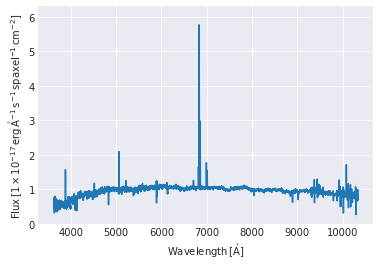

In [42]:
spec = cube.flux[:,17,17]
print(type(spec))
print(spec)
print(spec.unit)
spec.plot()

## Maskbits
There is a new Maskbit class for improved maskbit handling.  All objects now include new **Maskbit** versions of the DRP/DAP quality flag (**quality_flag**), targeting bits (**target_flags**), and pixel masks (**pixmask**).  Now you can easily look up the labels for bits and create custom masks.  See http://sdss-marvin.readthedocs.io/en/latest/utils/maskbit.html for details

In [45]:
# H-alpha DAP quality flag
ha.quality_flag

<Maskbit 'MANGA_DAPQUAL' []>

In [46]:
ha.target_flags

[<Maskbit 'MANGA_TARGET1' ['SECONDARY_v1_1_0', 'SECONDARY_COM2', 'SECONDARY_v1_2_0']>,
 <Maskbit 'MANGA_TARGET2' []>,
 <Maskbit 'MANGA_TARGET3' []>]

In [47]:
ha.pixmask

<Maskbit 'MANGA_DAPPIXMASK' shape=(34, 34)>

In [53]:
# bits for mask value 1027
print('bits', ha.pixmask.values_to_bits(1027))
print('labels', ha.pixmask.values_to_labels(1027))

bits [0, 1, 10]
labels ['NOCOV', 'LOWCOV', 'MULTICOMP']


In [54]:
# convert the H-alpha mask into an list of labels
ha.pixmask.labels

[[['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV', 'DONOTUSE'],
  ['NOCOV', 'LOWCOV'

## Improved Query and Results Handling
The handling of Queries and Results has been improved to provider better means of retrieving all the results of a query, extracting columns of parameters, and quickly plotting results.  

* See http://sdss-marvin.readthedocs.io/en/latest/query.html for Query handling
* See http://sdss-marvin.readthedocs.io/en/latest/results.html for Results handling
* See http://sdss-marvin.readthedocs.io/en/latest/datamodel/query_dm.html for how to use the Query Datamodel
* See http://sdss-marvin.readthedocs.io/en/latest/utils/plot-scatter.html for quick scatter plotting
* See http://sdss-marvin.readthedocs.io/en/latest/utils/plot-hist.html for quick histogram plotting

In [65]:
from marvin.tools.query import Query
config.setRelease('MPL-4')
q = Query(search_filter='nsa.z < 0.1', returnparams=['cube.ra', 'cube.dec', 'absmag_g_r', 'nsa.elpetro_ba'])
r = q.run()

Your parsed filter is: 
nsa.z<0.1


Results contain of a total of 1282. Only returning the first 100 results.


In [66]:
# your results are now in Sets
r.results

<ResultSet(set=1.0/13, index=0:100, count_in_set=100, total=1282)>
[ResultRow(mangaid='1-109394', plate=8082, plateifu='8082-9102', ifu_name='9102', ra=50.179936141, dec=-1.0022917898, elpetro_absmag_g_r=1.26038932800293, elpetro_ba=0.42712, z=0.0361073),
 ResultRow(mangaid='1-113208', plate=8618, plateifu='8618-3701', ifu_name='3701', ra=317.504479435, dec=9.86822191739, elpetro_absmag_g_r=1.48788070678711, elpetro_ba=0.752286, z=0.0699044),
 ResultRow(mangaid='1-113219', plate=7815, plateifu='7815-9102', ifu_name='9102', ra=317.374745914, dec=10.0519434342, elpetro_absmag_g_r=0.543312072753906, elpetro_ba=0.517058, z=0.0408897),
 ResultRow(mangaid='1-113375', plate=7815, plateifu='7815-9101', ifu_name='9101', ra=316.639658795, dec=10.7512221884, elpetro_absmag_g_r=0.757579803466797, elpetro_ba=0.570455, z=0.028215),
 ResultRow(mangaid='1-113379', plate=7815, plateifu='7815-6101', ifu_name='6101', ra=316.541566803, dec=10.3454195236, elpetro_absmag_g_r=1.09770011901855, elpetro_ba=0.3

In [67]:
# see the available columns
r.columns

<ParameterGroup name=Columns, n_parameters=9>
 [<QueryParameter full=cube.mangaid, name=mangaid, short=mangaid, remote=mangaid, display=Manga-ID>,
 <QueryParameter full=cube.plate, name=plate, short=plate, remote=plate, display=Plate>,
 <QueryParameter full=cube.plateifu, name=plateifu, short=plateifu, remote=plateifu, display=Plate-IFU>,
 <QueryParameter full=ifu.name, name=ifu_name, short=ifu_name, remote=ifu_name, display=Name>,
 <QueryParameter full=cube.ra, name=ra, short=ra, remote=ra, display=RA>,
 <QueryParameter full=cube.dec, name=dec, short=dec, remote=dec, display=Dec>,
 <QueryParameter full=nsa.elpetro_absmag_g_r, name=elpetro_absmag_g_r, short=absmag_g_r, remote=elpetro_absmag_g_r, display=Absmag g-r>,
 <QueryParameter full=nsa.elpetro_ba, name=elpetro_ba, short=axisratio, remote=elpetro_ba, display=Elpetro axis ratio>,
 <QueryParameter full=nsa.z, name=z, short=z, remote=z, display=Redshift>]

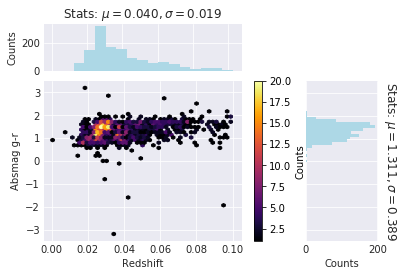

In [68]:
# quickly plot the redshift vs g-r color
output = r.plot('nsa.z', 'absmag_g_r')

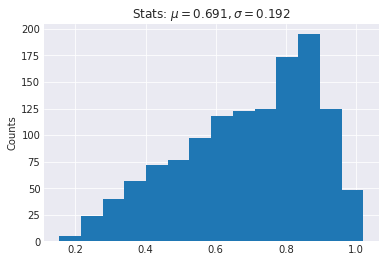

In [70]:
# or a histogram of the elpetro b/a axis ratio
output=r.hist('elpetro_ba')

In [72]:
# get all of the g-r colors as a list
gr = r.getListOf('absmag_g_r', return_all=True)
gr

[1.26038932800293,
 1.48788070678711,
 0.543312072753906,
 0.757579803466797,
 1.09770011901855,
 0.745466232299805,
 1.44098854064941,
 0.847789764404297,
 1.7510347366333,
 1.57906627655029,
 1.57906627655029,
 1.26716613769531,
 0.952407836914062,
 1.41732978820801,
 1.41732978820801,
 1.68158912658691,
 1.02355575561523,
 1.78754997253418,
 1.4986743927002,
 1.10831832885742,
 2.80322933197021,
 1.25676536560059,
 0.995195388793945,
 0.61408805847168,
 0.69244384765625,
 0.751516342163086,
 1.44381332397461,
 1.43171119689941,
 1.86342239379883,
 2.19032287597656,
 1.41496467590332,
 1.70641708374023,
 0.658689498901367,
 0.99525260925293,
 1.34337997436523,
 1.43183898925781,
 1.29723358154297,
 1.21394157409668,
 1.14164924621582,
 1.4673023223877,
 1.73165702819824,
 1.65719413757324,
 1.01249313354492,
 1.3456974029541,
 1.14808464050293,
 2.77035713195801,
 1.65952682495117,
 0.912630081176758,
 1.49947357177734,
 1.1044979095459,
 1.13131713867188,
 0.99519157409668,
 1.38611

In [75]:
# the results currently only have 100 out of some total
print(r.count, r.totalcount)

# let's extend our result set by the next chunk of 100
r.extendSet()

INFO:Brain:Retrieving next 100, from 100 to 200


100 1282
INFO: Retrieving next 100, from 100 to 200


In [77]:
print(r.count, r.totalcount)
print(r.results)

200 1282
<ResultSet(set=1.0/7, index=0:200, count_in_set=200, total=1282)>
[ResultRow(mangaid='1-109394', plate=8082, plateifu='8082-9102', ifu_name='9102', ra=50.179936141, dec=-1.0022917898, elpetro_absmag_g_r=1.26038932800293, elpetro_ba=0.42712, z=0.0361073),
 ResultRow(mangaid='1-113208', plate=8618, plateifu='8618-3701', ifu_name='3701', ra=317.504479435, dec=9.86822191739, elpetro_absmag_g_r=1.48788070678711, elpetro_ba=0.752286, z=0.0699044),
 ResultRow(mangaid='1-113219', plate=7815, plateifu='7815-9102', ifu_name='9102', ra=317.374745914, dec=10.0519434342, elpetro_absmag_g_r=0.543312072753906, elpetro_ba=0.517058, z=0.0408897),
 ResultRow(mangaid='1-113375', plate=7815, plateifu='7815-9101', ifu_name='9101', ra=316.639658795, dec=10.7512221884, elpetro_absmag_g_r=0.757579803466797, elpetro_ba=0.570455, z=0.028215),
 ResultRow(mangaid='1-113379', plate=7815, plateifu='7815-6101', ifu_name='6101', ra=316.541566803, dec=10.3454195236, elpetro_absmag_g_r=1.09770011901855, elpetr

The Query Datamodel shows you every parameter that is available to search on.  It groups parameters together into common types.  

In [78]:
qdm = q.datamodel
qdm

<QueryDataModel release='MPL-4', n_groups=7, n_parameters=41, n_total=0>

In [79]:
qdm.groups

[<ParameterGroup name=Metadata, n_parameters=7>,
 <ParameterGroup name=Spaxel Metadata, n_parameters=3>,
 <ParameterGroup name=Emission Lines, n_parameters=13>,
 <ParameterGroup name=Kinematics, n_parameters=6>,
 <ParameterGroup name=Spectral Indices, n_parameters=1>,
 <ParameterGroup name=NSA Catalog, n_parameters=11>,
 <ParameterGroup name=Other, n_parameters=0>]

In [80]:
# look at all the available NSA parameters
qdm.groups['nsa'].parameters

[<QueryParameter full=nsa.iauname, name=iauname, short=iauname, remote=iauname, display=IAU Name>,
 <QueryParameter full=nsa.ra, name=ra, short=ra, remote=ra, display=RA>,
 <QueryParameter full=nsa.dec, name=dec, short=dec, remote=dec, display=Dec>,
 <QueryParameter full=nsa.z, name=z, short=z, remote=z, display=Redshift>,
 <QueryParameter full=nsa.elpetro_ba, name=elpetro_ba, short=axisratio, remote=elpetro_ba, display=Elpetro axis ratio>,
 <QueryParameter full=nsa.elpetro_mag_g_r, name=elpetro_mag_g_r, short=g_r, remote=elpetro_mag_g_r, display=g-r>,
 <QueryParameter full=nsa.elpetro_absmag_g_r, name=elpetro_absmag_g_r, short=absmag_g_r, remote=elpetro_absmag_g_r, display=Absmag g-r>,
 <QueryParameter full=nsa.elpetro_logmass, name=elpetro_logmass, short=logmass, remote=elpetro_logmass, display=Elpetro Stellar Mass>,
 <QueryParameter full=nsa.elpetro_th50_r, name=elpetro_th50_r, short=th50_r, remote=elpetro_th50_r, display=r-band half-light radius>,
 <QueryParameter full=nsa.sersic_l